In [1]:
import os
os.listdir()


['.config', 'Strava Running Data.xlsx', 'sample_data']

In [2]:
import pandas as pd

df = pd.read_excel("Strava Running Data.xlsx")
df.head()


,Sr. no.,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,start_latlng,end_latlng,sport_type,start_date,timezone,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed
0,1,2023-12-09T09:09:19Z,Run,10879.7,4023,4617,91.4,"[40.70327935740352, -73.99619171395898]","[40.69340907968581, -73.97922154515982]",Run,2023-12-09T14:09:19Z,(GMT-05:00) America/New_York,4,4,0,3,0,2.704,6.228
1,2,2023-12-07T17:31:50Z,Run,1304.4,722,62993,0.0,"[40.7220459356904, -74.03641730546951]","[40.719722136855125, -74.03257705271244]",Run,2023-12-07T22:31:50Z,(GMT-05:00) America/New_York,0,0,0,1,0,1.807,4.044
2,3,2023-12-03T09:18:13Z,Run,17503.0,7370,7462,68.4,"[40.74991073459387, -73.98751585744321]","[40.73538766242564, -73.9793517999351]",Run,2023-12-03T14:18:13Z,(GMT-05:00) America/New_York,2,5,0,4,0,2.375,6.778
3,4,2023-12-02T09:41:14Z,Run,3457.8,1791,2170,3.9,"[40.72203076444566, -74.03641068376601]","[40.71398631669581, -74.03902692720294]",Run,2023-12-02T14:41:14Z,(GMT-05:00) America/New_York,0,2,0,3,0,1.931,4.522
4,5,2023-12-01T17:06:05Z,Run,10108.2,4128,4221,6.3,"[40.72190687991679, -74.03624514117837]","[40.71669920347631, -74.03264125809073]",Run,2023-12-01T22:06:05Z,(GMT-05:00) America/New_York,4,5,0,1,0,2.449,5.462


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr. no.               105 non-null    int64  
 1   start_date_local      105 non-null    object 
 2   type                  105 non-null    object 
 3   distance              105 non-null    float64
 4   moving_time           105 non-null    int64  
 5   elapsed_time          105 non-null    int64  
 6   total_elevation_gain  105 non-null    float64
 7   start_latlng          105 non-null    object 
 8   end_latlng            105 non-null    object 
 9   sport_type            105 non-null    object 
 10  start_date            105 non-null    object 
 11  timezone              105 non-null    object 
 12  achievement_count     105 non-null    int64  
 13  kudos_count           105 non-null    int64  
 14  comment_count         105 non-null    int64  
 15  athlete_count         1

In [4]:
df.columns


Index(['Sr. no.', 'start_date_local', 'type', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'start_latlng', 'end_latlng',
       'sport_type', 'start_date', 'timezone', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'average_speed', 'max_speed'],
      dtype='object')

In [5]:
df.isnull().sum()


,0
Sr. no.,0
start_date_local,0
type,0
distance,0
moving_time,0
elapsed_time,0
total_elevation_gain,0
start_latlng,0
end_latlng,0
sport_type,0


**Olah kolom waktu**

In [6]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])

df['hour'] = df['start_date_local'].dt.hour
df['day'] = df['start_date_local'].dt.day_name()

df[['start_date_local', 'hour', 'day']].head()


,start_date_local,hour,day
0,2023-12-09 09:09:19+00:00,9,Saturday
1,2023-12-07 17:31:50+00:00,17,Thursday
2,2023-12-03 09:18:13+00:00,9,Sunday
3,2023-12-02 09:41:14+00:00,9,Saturday
4,2023-12-01 17:06:05+00:00,17,Friday


**Hitung frekuensi lari per jam**

In [7]:
hour_count = df['hour'].value_counts().sort_index()
hour_count


,count
hour,
6,4
7,14
8,12
9,13
10,2
11,8
12,3
14,3
15,1


**Visualisasi Jam Favorit**

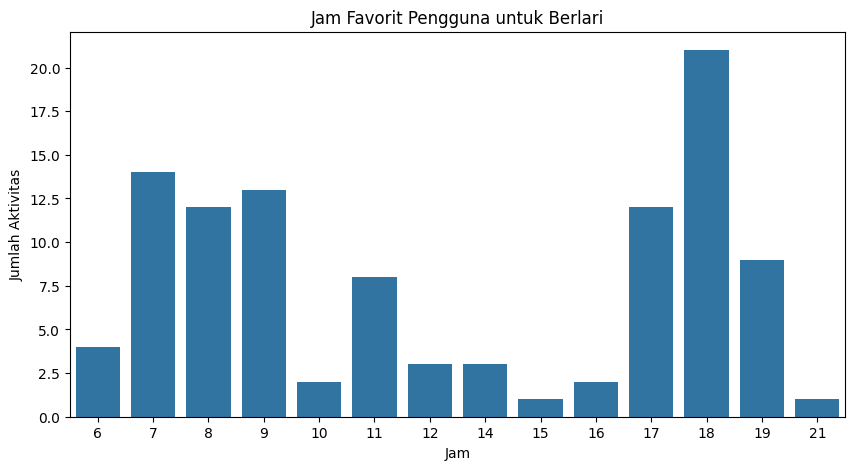

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df)
plt.title('Jam Favorit Pengguna untuk Berlari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Aktivitas')
plt.show()


**Urutkan hari dan Visualisasi Hari Favorit**

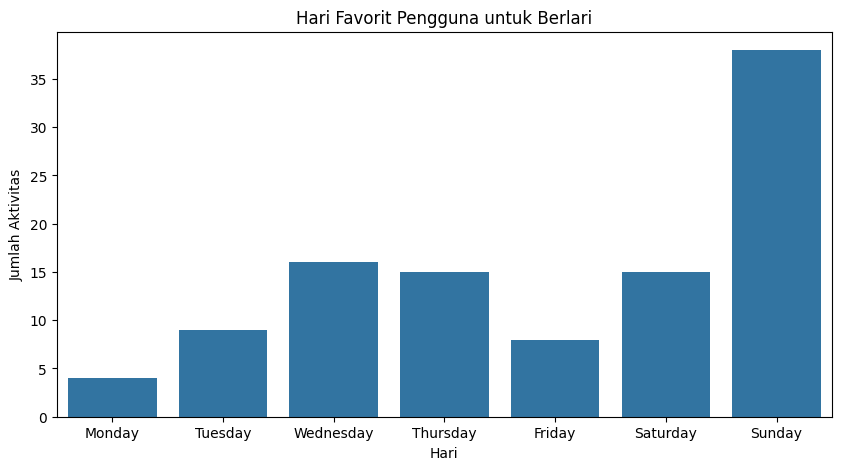

In [10]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5))
sns.countplot(x='day', data=df, order=day_order)
plt.title('Hari Favorit Pengguna untuk Berlari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Aktivitas')
plt.show()



**Rata-rata Jarak per Hari**

In [12]:
avg_distance_day = df.groupby('day')['distance'].mean().reindex(day_order)
avg_distance_day


,distance
day,
Monday,5689.175000
Tuesday,4060.422222
Wednesday,6360.343750
Thursday,4194.746667
Friday,3657.500000
Saturday,9837.246667
Sunday,8980.757895


**Durasi Lari per Jam**

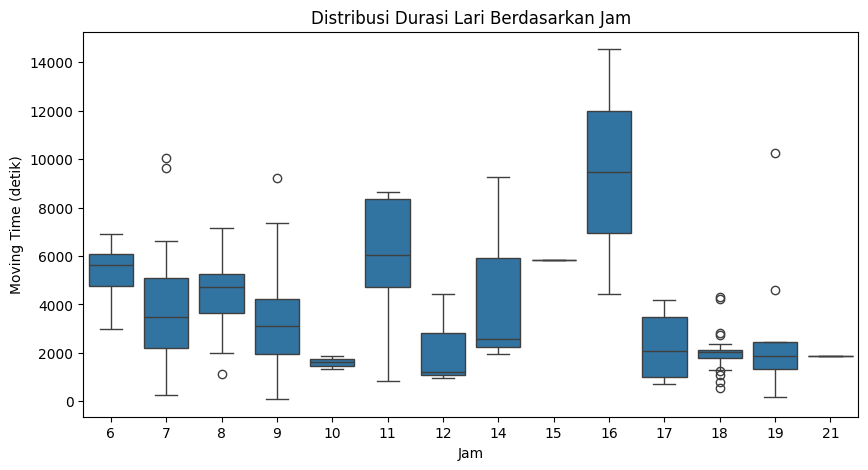

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='moving_time', data=df)
plt.title('Distribusi Durasi Lari Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Moving Time (detik)')
plt.show()
